<a href="https://colab.research.google.com/github/Purity-noob/Machine-Learning/blob/main/Concrete_Compressive_Strength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn openpyxl


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df = pd.read_excel("Concrete_Data.xls")
df.head()


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
print(df.isnull().sum())


Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64


In [7]:
df.rename(columns={"Concrete compressive strength(MPa, megapascals) ": "strength"}, inplace=True)


In [10]:
X_concrete = df.drop("strength", axis=1)
y_concrete = df["strength"]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_concrete, y_concrete, test_size=0.2, random_state=42)


Ridge Regression

In [12]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

print("Ridge Regression Results:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("R² Score:", r2_score(y_test, y_pred_ridge))


Ridge Regression Results:
RMSE: 9.796705633859066
R² Score: 0.6275417727142355


Feature Importance Ridge Coefficients

<ipython-input-21-478ddb3ca979>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=ridge_coef_df, palette="coolwarm")


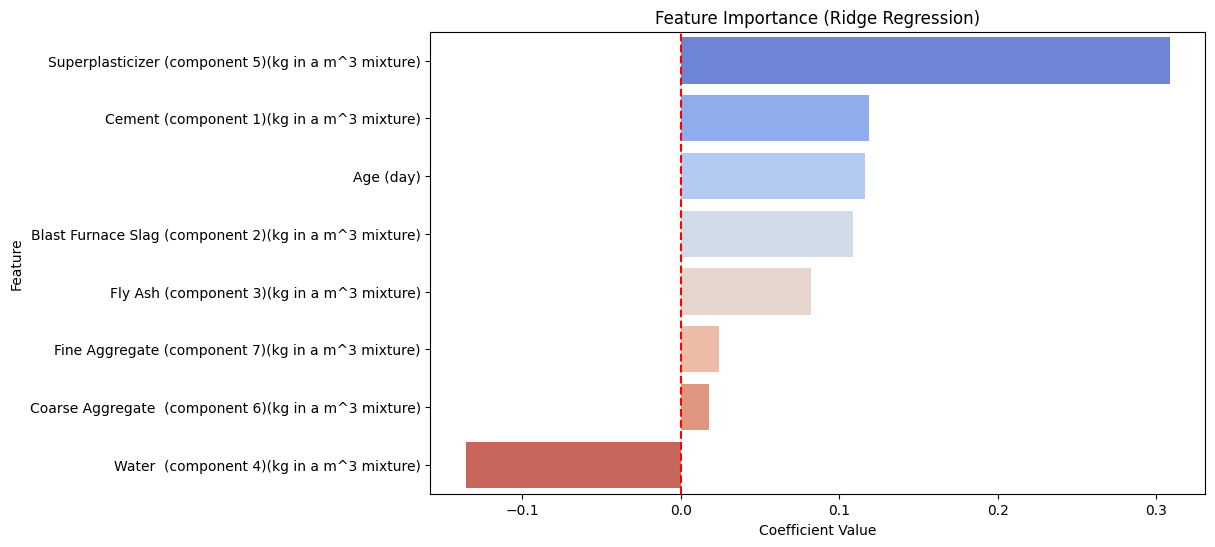

In [21]:

ridge_coeffs = ridge.coef_
ridge_coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": ridge_coeffs})
ridge_coef_df = ridge_coef_df.sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", data=ridge_coef_df, palette="coolwarm")
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Feature Importance (Ridge Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()


Actual vs. Predicted Plot

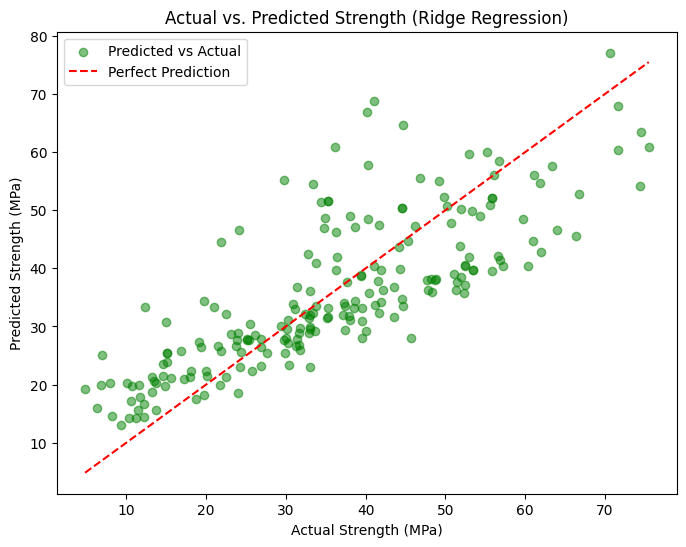

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5, color="green", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Perfect Prediction")
plt.xlabel("Actual Strength (MPa)")
plt.ylabel("Predicted Strength (MPa)")
plt.title("Actual vs. Predicted Strength (Ridge Regression)")
plt.legend()
plt.show()


Residual Distribution

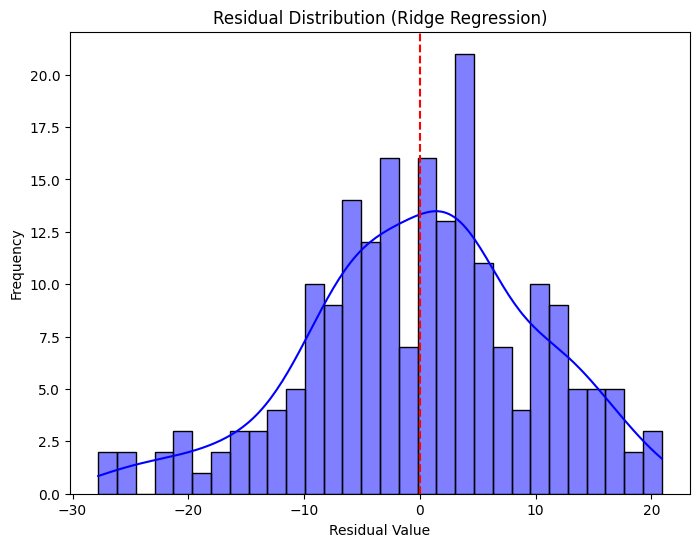

In [20]:
ridge_residuals = y_test - y_pred_ridge

plt.figure(figsize=(8, 6))
sns.histplot(ridge_residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Residual Distribution (Ridge Regression)")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.show()


Lasso Regression

In [17]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

print("Lasso Regression Results:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("R² Score:", r2_score(y_test, y_pred_lasso))

Lasso Regression Results:
RMSE: 9.796425637977986
R² Score: 0.6275630625810789


Feature Importance (Lasso Coefficients)

<ipython-input-14-a66765907c13>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette="viridis")


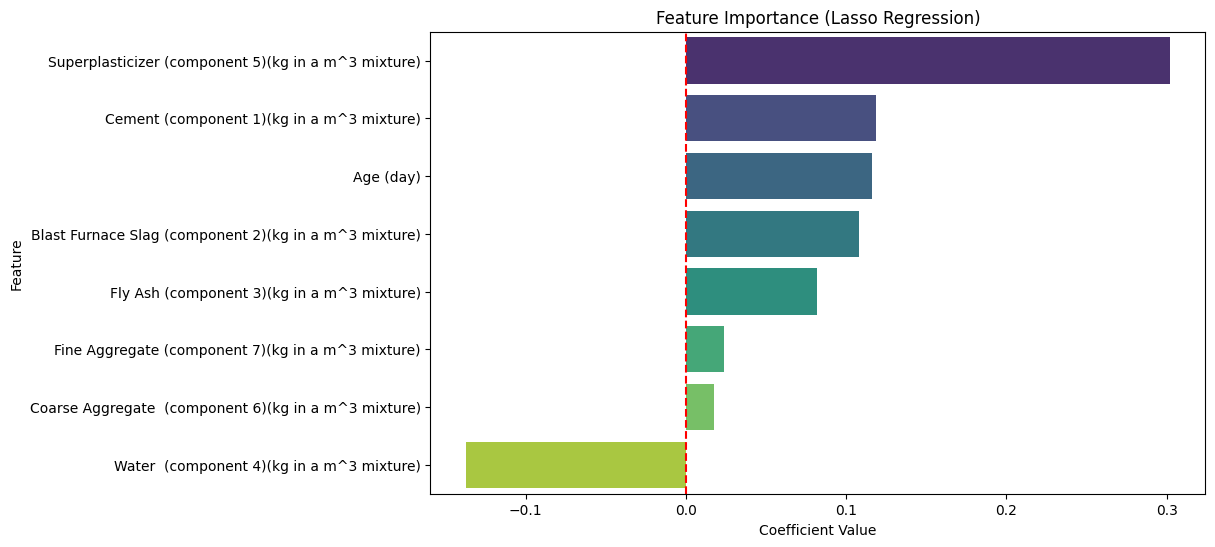

In [14]:
# Get feature names
feature_names = X_concrete.columns

# Get Lasso coefficients
lasso_coeffs = lasso.coef_

# Create a DataFrame
coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": lasso_coeffs})

# Sort by importance
coef_df = coef_df.sort_values(by="Coefficient", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette="viridis")
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Feature Importance (Lasso Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()


Actual vs. Predicted Plot (Scatter Plot)

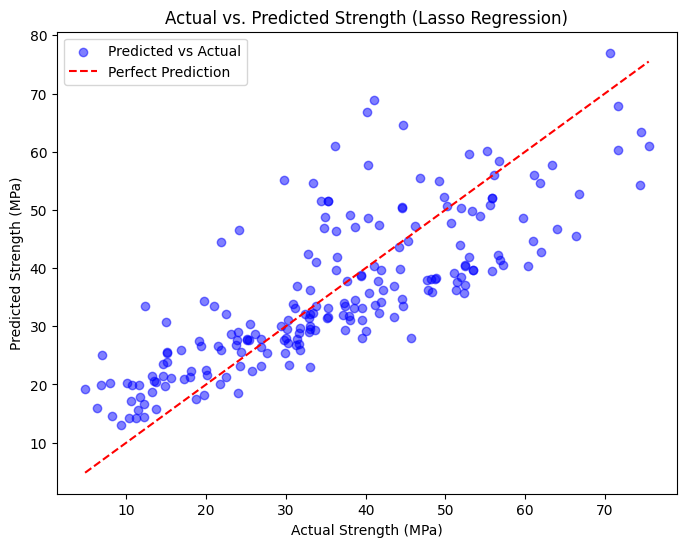

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Perfect Prediction")
plt.xlabel("Actual Strength (MPa)")
plt.ylabel("Predicted Strength (MPa)")
plt.title("Actual vs. Predicted Strength (Lasso Regression)")
plt.legend()
plt.show()


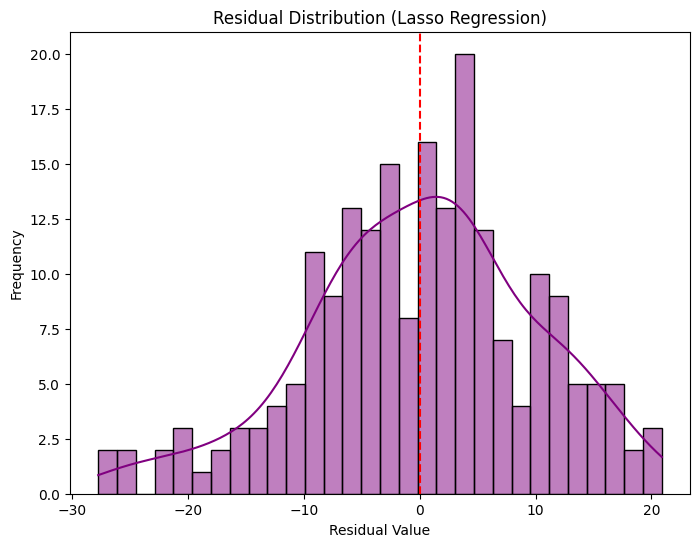

In [16]:
residuals = y_test - y_pred_lasso

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Residual Distribution (Lasso Regression)")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.show()
